Erro durante a otimização da rota de poda: ('Connectivity is undefined ', 'for the null graph.')


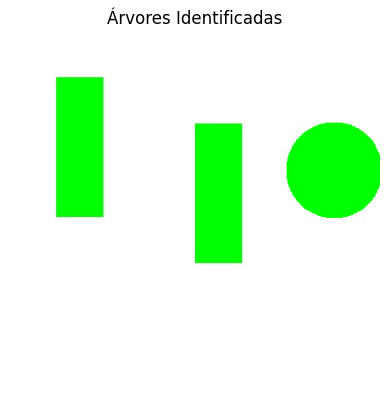

Imagem com as árvores identificadas salva com sucesso como 'trees_identified.jpg'.
Rota ótima de poda: []
Distância total da rota ótima: 0


In [4]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    try:
        # Carregar a imagem
        image = cv2.imread(image_path)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError("Não foi possível abrir a imagem. Verifique o caminho.")

        # Converter para escala de cinza
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Aplicar filtro para detecção de bordas
        edges = cv2.Canny(gray, 50, 150)

        return edges
    except Exception as e:
        print("Erro durante o pré-processamento da imagem:", e)
        return None

def find_trees(image):
    try:
        # Verificar se a imagem é válida
        if image is None:
            raise ValueError("Imagem inválida.")

        # Encontrar contornos na imagem
        contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Filtrar contornos para encontrar formas aproximadamente circulares (árvores)
        trees = []
        for contour in contours:
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
            if len(approx) > 6:  # Considerar como árvore se tiver muitos vértices
                trees.append(contour)

        return trees
    except Exception as e:
        print("Erro durante a identificação de árvores:", e)
        return []

def optimize_tree_pruning(trees):
    try:
        # Verificar se há árvores para otimizar
        if not trees:
            raise ValueError("Nenhuma árvore para otimização.")

        # Criar um grafo para representar as árvores e calcular as rotas ótimas de poda
        G = nx.Graph()
        for i, tree in enumerate(trees):
            G.add_node(i, pos=(tree.mean(axis=0)[0][0], tree.mean(axis=0)[0][1]))

        # Calcular as distâncias entre as árvores e adicionar arestas ponderadas ao grafo
        for i in range(len(trees)):
            for j in range(i + 1, len(trees)):
                distance = np.linalg.norm(np.array(G.nodes[i]['pos']) - np.array(G.nodes[j]['pos']))
                G.add_edge(i, j, weight=distance)

        # Calcular a rota ótima de poda usando o algoritmo TSP (Traveling Salesman Problem)
        optimal_route = nx.approximation.traveling_salesman_problem(G)

        # Calcular a distância total da rota ótima
        total_distance = sum(G.edges[i, j]['weight'] for i, j in zip(optimal_route, optimal_route[1:]))

        return optimal_route, total_distance
    except Exception as e:
        print("Erro durante a otimização da rota de poda:", e)
        return [], 0

def visualize_trees(image, trees, save_image=False):
    try:
        # Verificar se a imagem e as árvores são válidas
        if image is None or not trees:
            raise ValueError("Imagem ou árvores inválidas.")

        # Desenhar contornos das árvores na imagem
        image_with_trees = cv2.drawContours(image.copy(), trees, -1, (0, 255, 0), 2)

        plt.imshow(cv2.cvtColor(image_with_trees, cv2.COLOR_BGR2RGB))
        plt.title('Árvores Identificadas')
        plt.axis('off')
        plt.show()

        # Salvar a imagem com as árvores identificadas, se solicitado
        if save_image:
            cv2.imwrite('trees_identified.jpg', image_with_trees)
            print("Imagem com as árvores identificadas salva com sucesso como 'trees_identified.jpg'.")
    except Exception as e:
        print("Erro durante a visualização das árvores:", e)

def main():
    try:
        # Caminho da imagem de entrada
        image_path = 'trees_image.jpg'

        # Pré-processamento da imagem
        edges = preprocess_image(image_path)

        # Identificar árvores na imagem
        trees = find_trees(edges)

        # Otimizar rotas de poda
        optimal_route, total_distance = optimize_tree_pruning(trees)

        # Visualizar árvores identificadas na imagem e salvar a imagem se desejar
        image = cv2.imread(image_path)
        visualize_trees(image, trees, save_image=True)

        # Visualizar a rota ótima de poda e exibir a distância total da rota
        print("Rota ótima de poda:", optimal_route)
        print("Distância total da rota ótima:", total_distance)
    except Exception as e:
        print("Erro durante a execução do programa:", e)

if __name__ == "__main__":
    main()
